# Partie 2 : Les intervalles de confiance par la méthode de Bootstrap

In [1]:
%reset -f

import pandas as pd
import numpy as np
import random
import seaborn as sns
from sklearn.utils import resample 
from sklearn.metrics import accuracy_score 
from matplotlib import pyplot as plt 
import scipy.stats
from scipy.stats import *

## Application 1 : L'évaluation de la performance des intervalles de confiances avec les expériences de Monte-Carlo

In [2]:
def Bias_B(L,theta):
    return np.mean(L)-theta

def MSE_B(L,theta):
    B=len(L)
    res=0
    for b in range(0,B):
        res=(L[b]-theta)**2
    res=res/B
    
    return res

def Montecarlo_simu(m, n, B):
    L=[]
    for b in range(B):
        X_etoile_b = np.random.exponential(scale=m, size=n)
        #X_etoile_b = random.choices(X_etoile_b, k=n)
        L.append(np.mean(X_etoile_b))
    return L

In [3]:
np.random.seed(0) #fixee nombre aleatoire

#donnees de simulations
n=10
m=20
B=5000

#echantillon
X = np.random.exponential(scale=m, size=n)
mean=np.mean(X)
std=n/(n-1)*np.std(X)


X_sorted=np.sort(X)

x_min=0
x_max=120
x = np.linspace(x_min, x_max, 1000)

X_bar_gamma = scipy.stats.gamma.rvs(n,0,mean/n,B)
X_bar_normal = scipy.stats.norm.rvs(mean,mean/np.sqrt(n),B)
L=Montecarlo_simu(mean, n, B)

Percentile_Bootstrap = bootstrap((X,), np.mean, confidence_level=0.95, n_resamples=B, random_state=0, method='basic').confidence_interval

In [4]:
table21=pd.DataFrame(columns=['Méthode','Limite inférieure','Limite supérieure'])

table21.loc[0,'Méthode']='Gamma estimée'
table21.loc[0,'Limite inférieure']=np.percentile(X_bar_gamma,2.5)
table21.loc[0,'Limite supérieure']=np.percentile(X_bar_gamma,97.5)

table21.loc[1,'Méthode']='Approximation TCL'
table21.loc[1,'Limite inférieure']=np.percentile(X_bar_normal,2.5)
table21.loc[1,'Limite supérieure']=np.percentile(X_bar_normal,97.5)

table21.loc[2,'Méthode']='Basic Bootstrap'
table21.loc[2,'Limite inférieure']=np.percentile(L,2.5)
table21.loc[2,'Limite supérieure']=np.percentile(L,97.5)

table21.loc[3,'Méthode']='Percentile Bootstrap'
table21.loc[3,'Limite inférieure']=Percentile_Bootstrap[0]
table21.loc[3,'Limite supérieure']=Percentile_Bootstrap[1]

table21

,Méthode,Limite inférieure,Limite supérieure
0,Gamma estimée,11.727094,40.429564
1,Approximation TCL,9.085476,38.713514
2,Basic Bootstrap,11.212251,41.284351
3,Percentile Bootstrap,12.347821,33.130965


## Application 2 : L'évaluation de la performance des intervalles de confiances à l'aide des modèles Bootstrap


### Intervalles de confiance

### L'évalution des intervalles de confiance à l'aide de 1000 échantillons qui suivent une loi expo

In [16]:
m = 20 # le parametre de la loi exponentielle
n = 50  #la taille du vecteur généré
B = 1000  #le nombre de Bootstrap
N = 1000
c1 = 0
c2 = 0
c3 = 0

for i in range(N):
    data = (np.random.exponential(scale=m, size=n),)
    CI1 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0, method='percentile').confidence_interval
    if CI1[0] < m < CI1[1]:
        c1 += 1
    CI2 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0, method='BCa').confidence_interval
    if CI2[0] < m < CI2[1]:
        c2 += 1
    CI3 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0, method='basic').confidence_interval
    if CI3[0] < m < CI3[1]:
        c3 += 1
print('percentile -> évaluation du niveau de confiance = ',abs(c1/N*100))
print('BCa -> évaluation du niveau de confiance = ',abs(c2/N*100))
print('basic -> évaluation du niveau de confiance = ',abs(c3/N*100))

percentile -> évaluation du niveau de confiance =  88.3
BCa -> évaluation du niveau de confiance =  88.6
basic -> évaluation du niveau de confiance =  87.8


### Exemple pour  des échantillons dont la taille varie de 10 à 1000 avec un pas de 50

In [32]:
l=[[],[],[]]
n_i=10
n_f=1150
pas=50

def ICs(n,l):
    m = 20 # le parametre de la loi exponentielle
    c1 = 0
    c2 = 0
    c3 = 0
    B = 100
    N = 1000
    for i in range(N):
        data = (np.random.exponential(scale=m, size=n),)
        CI1 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0,method='percentile').confidence_interval
        if CI1[0] < m < CI1[1]:
            c1 += 1
        CI2 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0, method='BCa').confidence_interval
        if CI2[0] < m < CI2[1]:
            c2 += 1
        CI3 = bootstrap(data, np.mean, confidence_level=0.9, n_resamples=B, random_state=0, method='basic').confidence_interval
        if CI3[0] < m < CI3[1]:
            c3 += 1
    l[0].append(c1/N)
    l[1].append(c2/N)
    l[2].append(c3/N)
    return l

for i in range(n_i,n_f,pas):
    l=ICs(i,l)

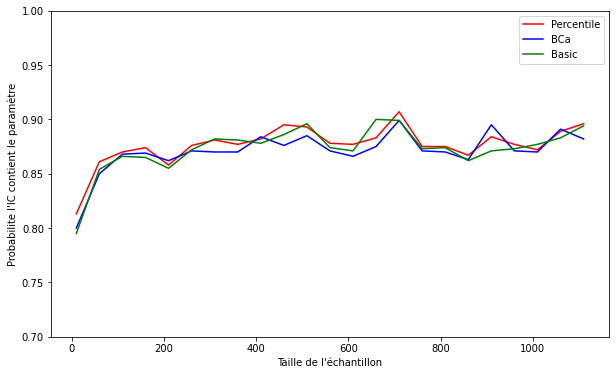

In [33]:
plt.figure(figsize=(10,6))
plt.plot(range(n_i,n_f,pas), l[0],'r',label='Percentile')
plt.plot(range(n_i,n_f,pas), l[1],'b',label='BCa')
plt.plot(range(n_i,n_f,pas), l[2],'g',label='Basic')
plt.legend()
plt.ylim((0.7,1))
plt.xlabel("Taille de l'échantillon")
plt.ylabel("Probabilite l'IC contient le paramètre")
plt.show()